<a href="https://colab.research.google.com/github/ash-win19/Methods-of-Data-Science/blob/main/MoDS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial number of patients: 10000
Initial number of attributes: 4


<ipython-input-15-51dc0f8b68e6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medication_age_counts = {med: binned_data[binned_data['Medication'] == med].groupby('Age_Bin').size() for med in medications}
<ipython-input-15-51dc0f8b68e6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medication_age_counts = {med: binned_data[binned_data['Medication'] == med].groupby('Age_Bin').size() for med in medications}
<ipython-input-15-51dc0f8b68e6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

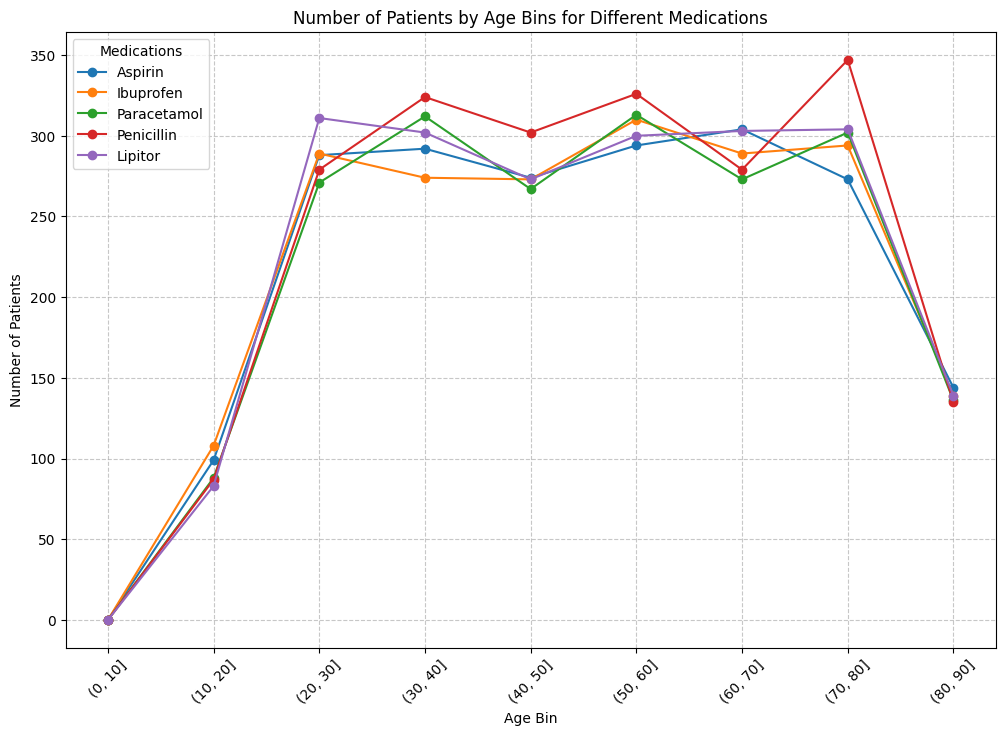

<ipython-input-15-51dc0f8b68e6>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspirin_data['Age_Group'] = pd.cut(aspirin_data['Age'], bins=range(16, int(aspirin_data['Age'].max()) + 2, 2))


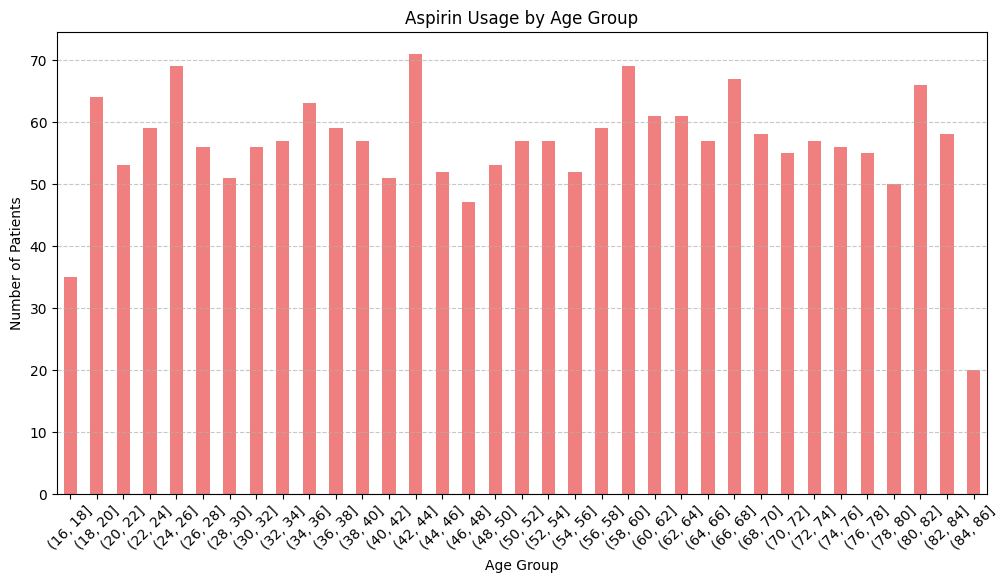

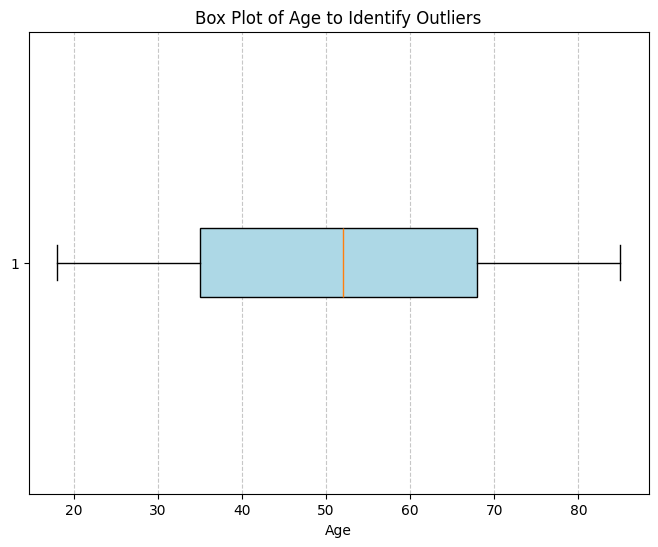

Maximum age: 85
Minimum age: 18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'Patients.csv' with the actual file name)
data = pd.read_csv('Patients.csv')

# Display initial patient and attribute counts
initial_patients = data.shape[0]
initial_attributes = data.shape[1]
print(f"Initial number of patients: {initial_patients}")
print(f"Initial number of attributes: {initial_attributes}")

# Count the number of patients by age and medication with age bins
medications = ['Aspirin', 'Ibuprofen', 'Paracetamol', 'Penicillin', 'Lipitor']
binned_data = data.copy()
binned_data['Age_Bin'] = pd.cut(binned_data['Age'], bins=range(0, int(data['Age'].max()) + 10, 10))
medication_age_counts = {med: binned_data[binned_data['Medication'] == med].groupby('Age_Bin').size() for med in medications}

# Line chart of Age Bins vs Number of Patients for each Medication
plt.figure(figsize=(12, 8))
for med, counts in medication_age_counts.items():
    counts.plot(label=med, marker='o')

plt.xlabel('Age Bin')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Age Bins for Different Medications')
plt.legend(title='Medications')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Exclude rows where Medication is not 'Aspirin'
aspirin_data = data[data['Medication'] == 'Aspirin']

# Group age into bins starting from 16 with a scale of 2
aspirin_data['Age_Group'] = pd.cut(aspirin_data['Age'], bins=range(16, int(aspirin_data['Age'].max()) + 2, 2))

# Count the number of patients in each age group
age_group_counts = aspirin_data['Age_Group'].value_counts().sort_index()

# Bar chart of Aspirin usage by age group
plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Aspirin Usage by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot to find outliers in Age
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Age')
plt.title('Box Plot of Age to Identify Outliers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Maximum and Minimum age
max_age = data['Age'].max()
min_age = data['Age'].min()
print(f"Maximum age: {max_age}")
print(f"Minimum age: {min_age}")